###Feature Extraction

In [1]:
import pandas as pd

df = pd.read_csv('/content/Qabas-dataset-cleaned.csv')
df.head()


,lemma_id,lemma,language,pos_cat,pos,root,gender,normalized_lemma,reshaped_lemma,char_tokens,letter_shapes
0,2023254710,سَاوِي,عامية,اسم,صفة,س و ي,مذكر,ساوي,ﻱﻭﺎﺳ,"['س', 'ا', 'و', 'ي']","[['س', 'ﺱ', 'ﺴ', 'ﺳ', 'ﺴ'], ['ا', 'ﺍ', 'ﺎ'], [..."
1,2023254711,رْكِيد,عامية,اسم,اسم,ر ك د,مذكر,ركيد,ﺪﻴﻛﺭ,"['ر', 'ك', 'ي', 'د']","[['ر', 'ﺭ', 'ﺮ'], ['ك', 'ﻙ', 'ﻜ', 'ﻛ', 'ﻜ'], [..."
2,2023254712,دُمَاجٌ,عامية,اسم,اسم,د م ج,مذكر,دماج,ﺝﺎﻣﺩ,"['د', 'م', 'ا', 'ج']","[['د', 'ﺩ', 'ﺪ'], ['م', 'ﻡ', 'ﻤ', 'ﻣ', 'ﻤ'], [..."
3,2023254713,دَامِرٌ,عامية,اسم,اسم,د م ر,مذكر,دامر,ﺮﻣﺍﺩ,"['د', 'ا', 'م', 'ر']","[['د', 'ﺩ', 'ﺪ'], ['ا', 'ﺍ', 'ﺎ'], ['م', 'ﻡ', ..."
4,2023254714,جَعَارٌ,عامية,اسم,صفة,ج ع ر,مذكر,جعار,ﺭﺎﻌﺟ,"['ج', 'ع', 'ا', 'ر']","[['ج', 'ﺝ', 'ﺠ', 'ﺟ', 'ﺠ'], ['ع', 'ﻉ', 'ﻌ', 'ﻋ..."


In [2]:
!pip install --upgrade numpy gensim


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [3]:
import numpy as np
from gensim.models import KeyedVectors


In [4]:
# Tag each letter with its position type
def tag_letter_positions(tokens):
    n = len(tokens)
    positions = []
    for i, letter in enumerate(tokens):
        if n == 1:
            positions.append('isolated')
        elif i == 0:
            positions.append('initial')
        elif i == n - 1:
            positions.append('final')
        else:
            positions.append('medial')
    return positions

df['letter_positions'] = df['char_tokens'].apply(tag_letter_positions)
df.head()


,lemma_id,lemma,language,pos_cat,pos,root,gender,normalized_lemma,reshaped_lemma,char_tokens,letter_shapes,letter_positions
0,2023254710,سَاوِي,عامية,اسم,صفة,س و ي,مذكر,ساوي,ﻱﻭﺎﺳ,"['س', 'ا', 'و', 'ي']","[['س', 'ﺱ', 'ﺴ', 'ﺳ', 'ﺴ'], ['ا', 'ﺍ', 'ﺎ'], [...","[initial, medial, medial, medial, medial, medi..."
1,2023254711,رْكِيد,عامية,اسم,اسم,ر ك د,مذكر,ركيد,ﺪﻴﻛﺭ,"['ر', 'ك', 'ي', 'د']","[['ر', 'ﺭ', 'ﺮ'], ['ك', 'ﻙ', 'ﻜ', 'ﻛ', 'ﻜ'], [...","[initial, medial, medial, medial, medial, medi..."
2,2023254712,دُمَاجٌ,عامية,اسم,اسم,د م ج,مذكر,دماج,ﺝﺎﻣﺩ,"['د', 'م', 'ا', 'ج']","[['د', 'ﺩ', 'ﺪ'], ['م', 'ﻡ', 'ﻤ', 'ﻣ', 'ﻤ'], [...","[initial, medial, medial, medial, medial, medi..."
3,2023254713,دَامِرٌ,عامية,اسم,اسم,د م ر,مذكر,دامر,ﺮﻣﺍﺩ,"['د', 'ا', 'م', 'ر']","[['د', 'ﺩ', 'ﺪ'], ['ا', 'ﺍ', 'ﺎ'], ['م', 'ﻡ', ...","[initial, medial, medial, medial, medial, medi..."
4,2023254714,جَعَارٌ,عامية,اسم,صفة,ج ع ر,مذكر,جعار,ﺭﺎﻌﺟ,"['ج', 'ع', 'ا', 'ر']","[['ج', 'ﺝ', 'ﺠ', 'ﺟ', 'ﺠ'], ['ع', 'ﻉ', 'ﻌ', 'ﻋ...","[initial, medial, medial, medial, medial, medi..."


In [11]:
# Flatten the DataFrame to character-level
records = []

for idx, row in df.iterrows():
    lemma_id = row['lemma_id']
    lemma = row['normalized_lemma']
    tokens = row['char_tokens']
    positions = row['letter_positions']
    shapes = row['letter_shapes']

    for i in range(len(tokens)):
        records.append({
            'lemma_id': lemma_id,
            'lemma': lemma,
            'char_index': i,
            'letter': tokens[i],
            'position': positions[i],
            'shape_variants': shapes[i]
        })

char_df = pd.DataFrame(records)


In [12]:
char_df.head()


,lemma_id,lemma,char_index,letter,position,shape_variants
0,2023254710,ساوي,0,[,initial,[
1,2023254710,ساوي,1,',medial,[
2,2023254710,ساوي,2,س,medial,'
3,2023254710,ساوي,3,',medial,س
4,2023254710,ساوي,4,",",medial,'


In [13]:
#Label Encode the Letter
#Convert each Arabic letter into an integer

from sklearn.preprocessing import LabelEncoder

letter_encoder = LabelEncoder()
char_df['letter_id'] = letter_encoder.fit_transform(char_df['letter'])

# Optional: save the mapping
letter_mapping = dict(zip(letter_encoder.classes_, letter_encoder.transform(letter_encoder.classes_)))



In [14]:
#One-Hot Encode the Position
#Convert initial, medial, final, isolated into one-hot columns

position_dummies = pd.get_dummies(char_df['position'], prefix='pos')
char_df = pd.concat([char_df, position_dummies], axis=1)


In [17]:
# Re-add any missing one-hot columns to avoid KeyError
for col in ['pos_initial', 'pos_medial', 'pos_final', 'pos_isolated']:
    if col not in char_df.columns:
        char_df[col] = 0


In [18]:
#Shape-Based Features
# Number of shape variants
char_df['num_shape_variants'] = char_df['shape_variants'].apply(len)

# Unicode of base shape (first shape in list)
char_df['base_shape_unicode'] = char_df['shape_variants'].apply(lambda shapes: ord(shapes[0]) if shapes else 0)


In [19]:
char_df[['letter', 'letter_id', 'position', 'pos_initial', 'pos_medial', 'pos_final', 'pos_isolated', 'num_shape_variants', 'base_shape_unicode']].head()


,letter,letter_id,position,pos_initial,pos_medial,pos_final,pos_isolated,num_shape_variants,base_shape_unicode
0,[,13,initial,True,False,False,0,1,91
1,',1,medial,False,True,False,0,1,91
2,س,35,medial,False,True,False,0,1,39
3,',1,medial,False,True,False,0,1,1587
4,",",3,medial,False,True,False,0,1,39


###Visualization


<ipython-input-20-d4cb251834c7>:12: UserWarning: Glyph 1649 (\N{ARABIC LETTER ALEF WASLA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-d4cb251834c7>:12: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1649 (\N{ARABIC LETTER ALEF WASLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


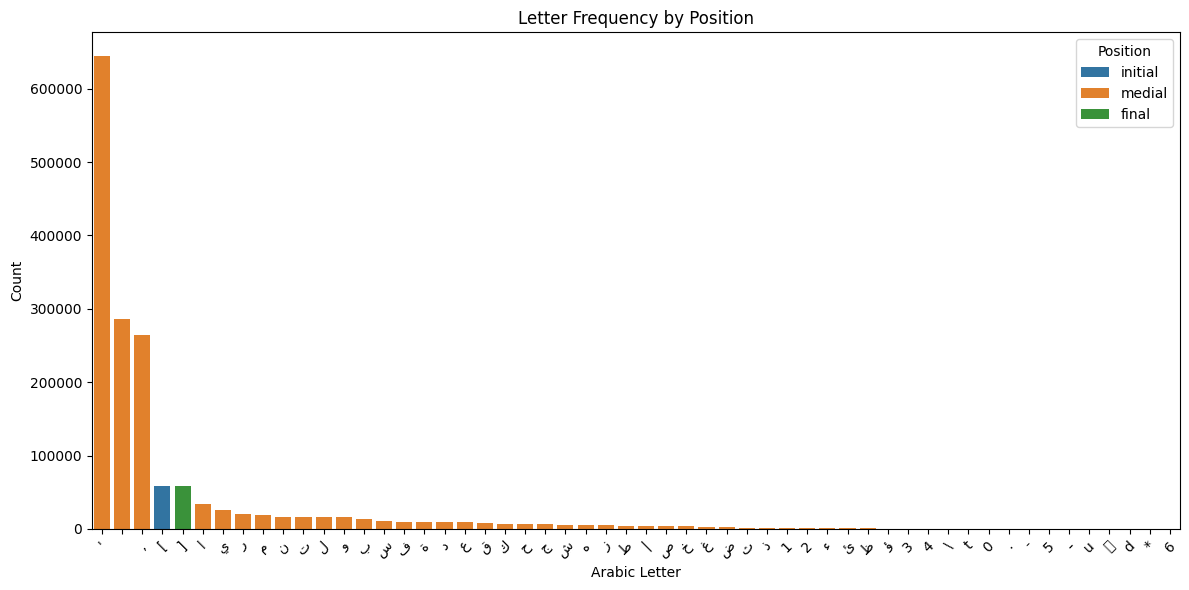

In [20]:
#Letter Frequency by Position
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=char_df, x='letter', hue='position', order=char_df['letter'].value_counts().index)
plt.title("Letter Frequency by Position")
plt.xlabel("Arabic Letter")
plt.ylabel("Count")
plt.legend(title="Position")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


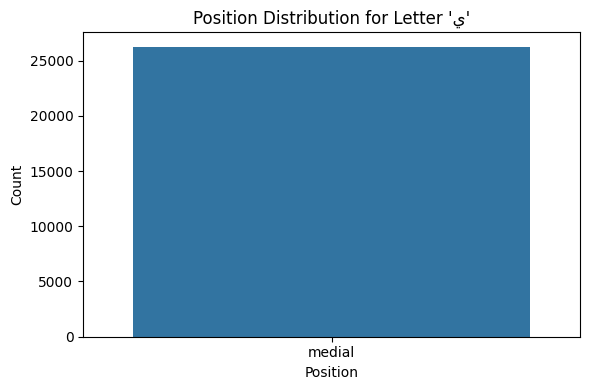

In [22]:
#Position Distribution for a Specific Letter (e.g. "ي")
letter_focus = "ي"
letter_position_counts = char_df[char_df['letter'] == letter_focus]['position'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=letter_position_counts.index, y=letter_position_counts.values)
plt.title(f"Position Distribution for Letter '{letter_focus}'")
plt.xlabel("Position")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


###Embedding-Based Feature Extraction for Arabic Letters


In [26]:
!pip install gensim


Prepare Data - List of Character Sequences

In [27]:
# Make sure you have the character tokens
sentences = df['char_tokens'].tolist()  # Each word = list of letters


 Train FastText on Letters

In [28]:
from gensim.models import FastText

# Train the model
letter_model = FastText(sentences, vector_size=50, window=2, min_count=1, sg=1, epochs=20)


In [29]:
letter_model.wv['ي']


array([-0.18209155, -0.00527351,  0.23113635, -0.0251415 ,  0.17055544,
        0.01095024,  0.06328792,  0.01167799, -0.0424568 , -0.02948689,
       -0.01257658,  0.01864511,  0.05568733,  0.17617853,  0.04859604,
       -0.20950581, -0.04447121, -0.1016404 ,  0.0148222 ,  0.00546022,
        0.17627679,  0.0249936 ,  0.11296929, -0.11051873, -0.13440841,
        0.09621843,  0.11667095, -0.0654863 , -0.12148309, -0.15590663,
        0.03356467, -0.03004002,  0.10032156, -0.12341455, -0.03660474,
        0.13220415,  0.03473365, -0.11454963, -0.08954829, -0.16826716,
       -0.1201918 ,  0.24201173,  0.19313793,  0.07876211, -0.17633095,
       -0.01168918, -0.02559236, -0.16987088,  0.02450894, -0.26253155],
      dtype=float32)

###Structuring the final dataset

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [31]:
#Encode Letter & Position Features
# Label Encode letter
letter_encoder = LabelEncoder()
char_df['letter_id'] = letter_encoder.fit_transform(char_df['letter'])

# One-hot encode position
position_dummies = pd.get_dummies(char_df['position'], prefix='pos')

# Add missing position types if not present
for pos_col in ['pos_initial', 'pos_medial', 'pos_final', 'pos_isolated']:
    if pos_col not in position_dummies.columns:
        position_dummies[pos_col] = 0

char_df = pd.concat([char_df, position_dummies], axis=1)

# Shape feature: number of shape variants
char_df['num_shape_variants'] = char_df['shape_variants'].apply(len)

# Unicode feature for base shape
char_df['base_shape_unicode'] = char_df['shape_variants'].apply(lambda shapes: ord(shapes[0]) if shapes else 0)




In [32]:
# Add Letter-Level Embeddings
# Each letter gets its vector from your trained FastText letter_model
def get_letter_vector(letter):
    try:
        return letter_model.wv[letter]
    except KeyError:
        return np.zeros(letter_model.vector_size)

# Apply and store in a new column
char_df['letter_embedding'] = char_df['letter'].apply(get_letter_vector)


In [33]:
# Flatten the embedding into separate columns
embedding_dim = letter_model.vector_size
embedding_df = pd.DataFrame(char_df['letter_embedding'].tolist(),
                            columns=[f'embedding_{i}' for i in range(embedding_dim)])

# Combine everything
final_df = pd.concat([
    char_df[['lemma_id', 'lemma', 'char_index', 'letter', 'letter_id', 'position',
             'num_shape_variants', 'base_shape_unicode',
             'pos_initial', 'pos_medial', 'pos_final', 'pos_isolated']],
    embedding_df
], axis=1)

final_df.head()


,lemma_id,lemma,char_index,letter,letter_id,position,num_shape_variants,base_shape_unicode,pos_initial,pos_initial,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,2023254710,ساوي,0,[,13,initial,1,91,True,True,...,-0.162601,0.103660,0.251259,-0.073490,-0.053252,0.377319,0.145386,-0.069100,0.080611,-0.215478
1,2023254710,ساوي,1,',1,medial,1,91,False,False,...,-0.084884,0.146857,0.143055,0.046306,-0.034598,0.025985,-0.015183,-0.101266,0.140413,-0.184533
2,2023254710,ساوي,2,س,35,medial,1,39,False,False,...,-0.089540,0.008605,-0.001778,0.075679,-0.030067,0.181460,-0.163078,-0.158807,-0.112291,-0.131514
3,2023254710,ساوي,3,',1,medial,1,1587,False,False,...,-0.084884,0.146857,0.143055,0.046306,-0.034598,0.025985,-0.015183,-0.101266,0.140413,-0.184533
4,2023254710,ساوي,4,",",3,medial,1,39,False,False,...,-0.135123,0.022151,0.135283,0.060031,-0.159025,0.033084,-0.100292,-0.060805,0.239573,-0.137830


In [34]:
final_df.to_csv("final_char_features.csv", index=False)
